# Python for HPC (matplotlib)

## Introduction

Python is a great general-purpose programming language on its own. This episode is focused on the basic syntax of the language. The lesson is particularly oriented to Scientific Computing. The episodes in the series include:

  * Basic Syntax 
  * The Python Standard Library
  * Numpy
  * Scipy
  * **Matplotlib \[This notebook\]**
  * Pandas
  * Cython

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from intereactive computing to scripting to big project developments.

In this tutorial, we will cover:

* Basic Plots

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB. Many of the examples here have been taken from https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html, 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [3]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

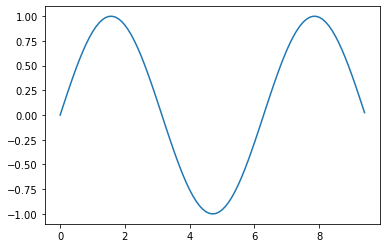

In [4]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

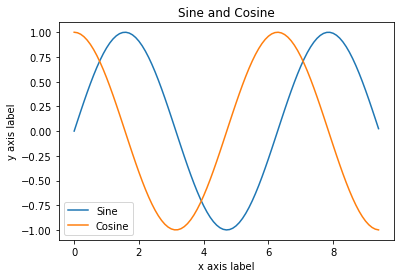

In [5]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

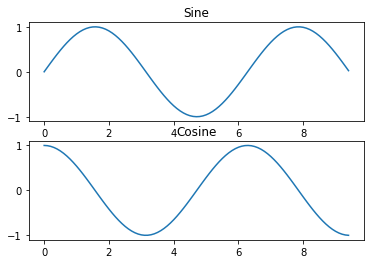

In [6]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

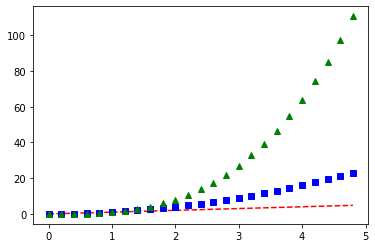

In [7]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

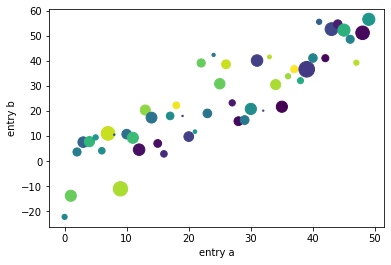

In [8]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

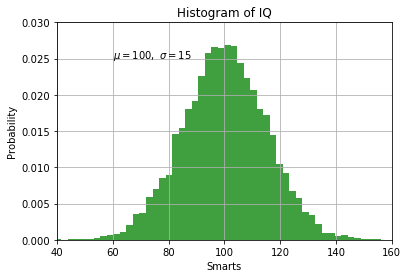

In [9]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

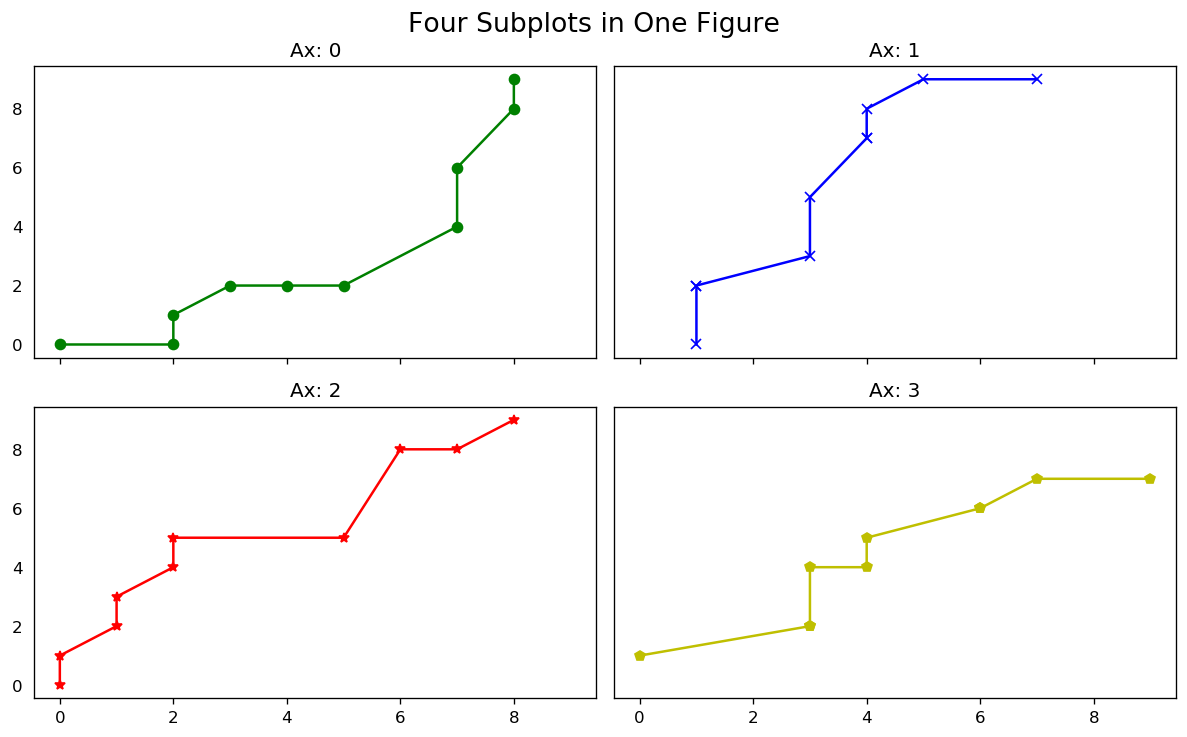

In [10]:
# Draw multiple plots using for-loops using object oriented syntax
from numpy.random import seed, randint
seed(100)

# Create Figure and Subplots
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()):
    ax.plot(sorted(randint(0,10,10)), sorted(randint(0,10,10)), marker=markers[i], color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')

plt.suptitle('Four Subplots in One Figure', verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.show()

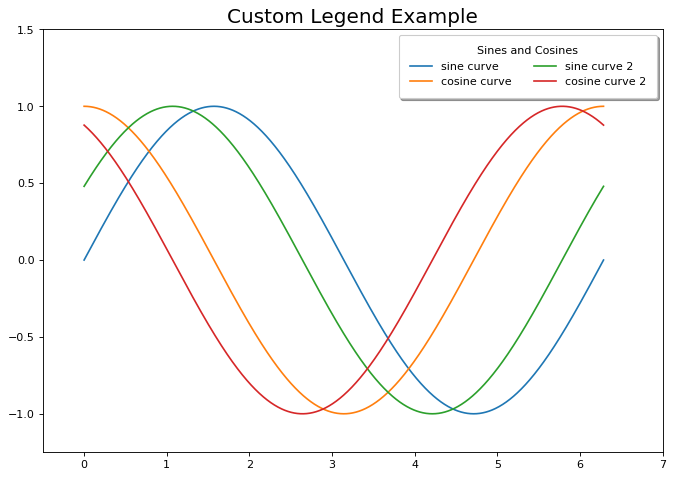

In [11]:
plt.figure(figsize=(10,7), dpi=80)
X = np.linspace(0, 2*np.pi, 1000)
sine = plt.plot(X,np.sin(X)); cosine = plt.plot(X,np.cos(X))
sine_2 = plt.plot(X,np.sin(X+.5)); cosine_2 = plt.plot(X,np.cos(X+.5))
plt.gca().set(ylim=(-1.25, 1.5), xlim=(-.5, 7))
plt.title('Custom Legend Example', fontsize=18)

# Modify legend
plt.legend([sine[0], cosine[0], sine_2[0], cosine_2[0]],   # plot items
           ['sine curve', 'cosine curve', 'sine curve 2', 'cosine curve 2'],  
           frameon=True,                                   # legend border
           framealpha=1,                                   # transparency of border
           ncol=2,                                         # num columns
           shadow=True,                                    # shadow on
           borderpad=1,                                    # thickness of border
           title='Sines and Cosines')                      # title
plt.show()

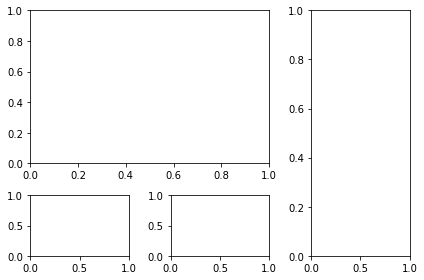

In [12]:
# Supplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)            # right
ax4 = plt.subplot2grid((3,3), (2,0))                       # bottom left
ax5 = plt.subplot2grid((3,3), (2,1))                       # bottom right
fig.tight_layout()

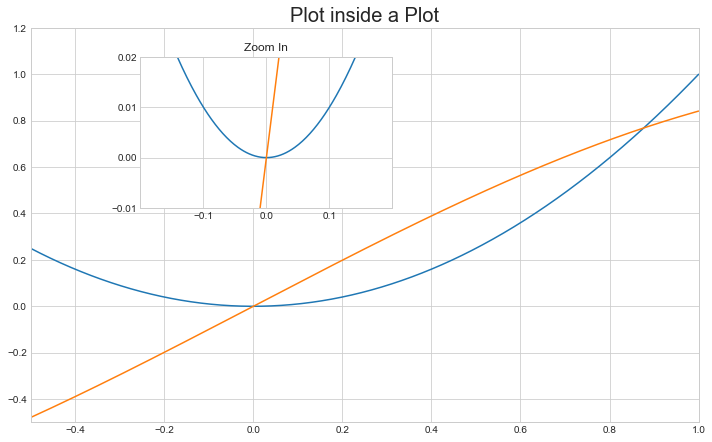

In [18]:
# Plot inside a plot
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5,1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1,0,.1])
ax.set_title("Plot inside a Plot", fontsize=20)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)  # reset to defaults

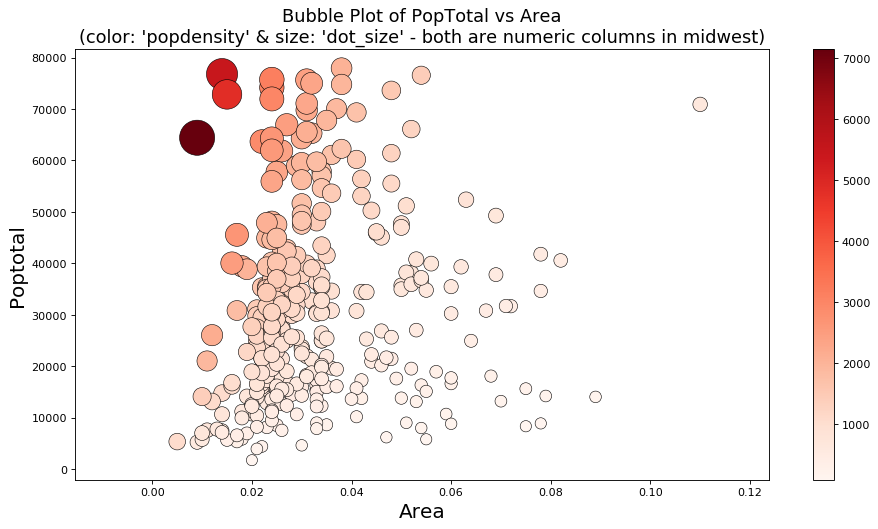

In [19]:
# Scatterplot with varying size and color of points
import pandas as pd
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('area', 'poptotal', data=midwest, s='dot_size', c='popdensity', cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)", fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show()     

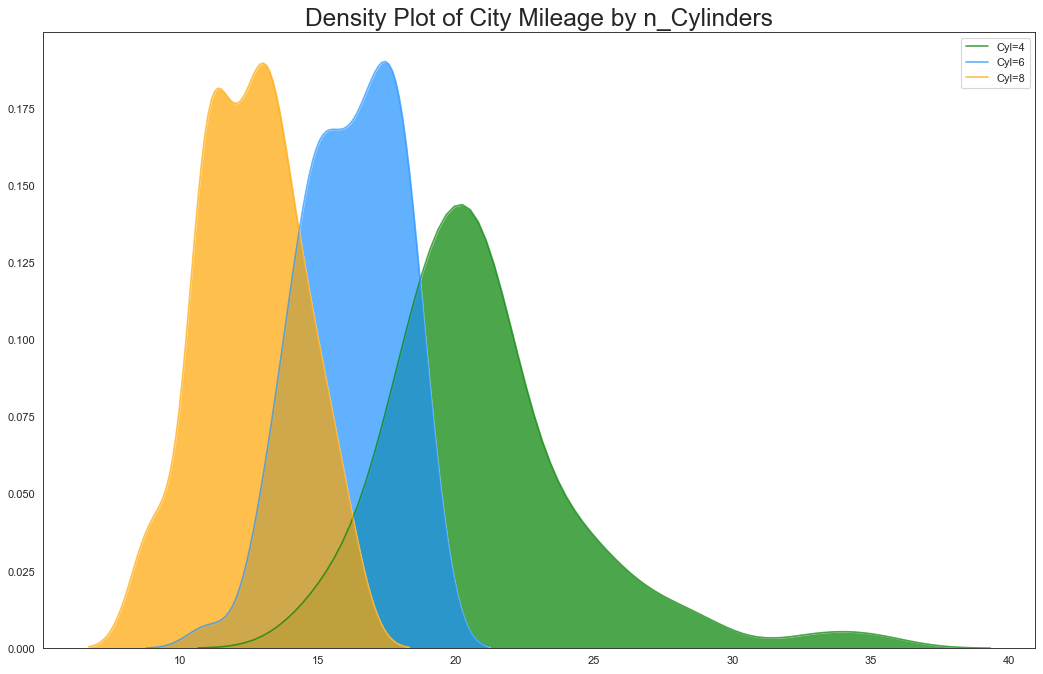

In [20]:
import seaborn as sns
sns.set_style("white")

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()